<a href="https://colab.research.google.com/github/Lucas-Pido/GSYAN/blob/main/GSYAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Selecione o arquivo compactado no seu computador
uploaded = files.upload()

Saving Imagens.zip to Imagens.zip


In [2]:
import zipfile

# Nome do arquivo ZIP que você fez o upload
zip_file_name = 'Imagens.zip'

# Caminho para extrair o conteúdo
extract_path = 'content/Imagens.zip'

# Extrai o conteúdo do arquivo ZIP
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [12]:
!pip install keras

In [23]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.compat.v2 as tf

data_dir = "/content/content/Imagens.zip/Imagens"

input_shape = (224, 224, 3)

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=10, validation_data=validation_generator)

model.save("keras_modelo.h5")

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 37s 3s/step - loss: 4.6039 - accuracy: 0.6281 - val_loss: 0.4305 - val_accuracy: 0.8500
Epoch 2/10
10/10 [==============================] - 31s 3s/step - loss: 0.2804 - accuracy: 0.9406 - val_loss: 0.3536 - val_accuracy: 0.8625
Epoch 3/10
10/10 [==============================] - 33s 3s/step - loss: 0.1274 - accuracy: 0.9563 - val_loss: 0.4983 - val_accuracy: 0.8500
Epoch 4/10
10/10 [==============================] - 31s 3s/step - loss: 0.0636 - accuracy: 0.9781 - val_loss: 0.4670 - val_accuracy: 0.8875
Epoch 5/10
10/10 [==============================] - 31s 3s/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.5045 - val_accuracy: 0.8875
Epoch 6/10
10/10 [==============================] - 31s 3s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.6009 - val_accuracy: 0.8750
Epoch 7/10
10/10 [==============================] - 31s 3s/step - loss: 0.0018 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 98ms/step
Classe: saudavel Teste de Confiança: 100 %


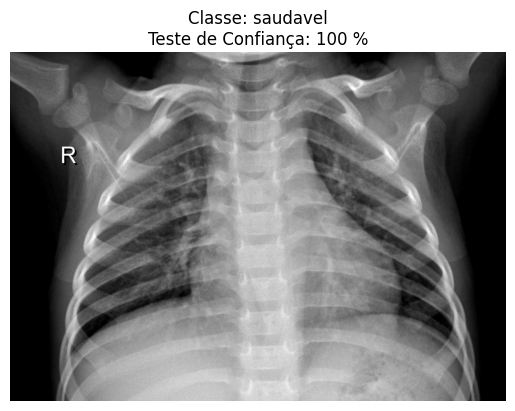

In [47]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt


np.set_printoptions(suppress=True)


# Carregar as Labels
class_names = ['pneumonia', 'saudavel']

# Carregar Imagem
img = cv2.imread('/content/content/Imagens.zip/Imagens/Saudavel/IM-0125-0001.jpeg')

# Checar se a imagem carrega corretamente
if img is None:
    print("Error: Could not load the image.")
else:
    # Resize the image to (224, 224) pixels
    image = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

    # Make the image a numpy array and reshape it to the model's input shape.
    image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)

  # Pré-processamento e treinamento
    image = (image / 255) - 1
    model = load_model("keras_modelo.h5", compile=False)

  #Pós treinamento
    prediction = model.predict(image)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score
    texto1 = f"Classe: {class_name}"
    texto2 = f"Teste de Confiança: {str(np.round(confidence_score * 100))[:-2]} %"

    print(texto1, texto2)

    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Classe: {class_name}\nTeste de Confiança: {str(np.round(confidence_score * 100))[:-2]} %")
    plt.axis('off')
    plt.show()